<a href="https://colab.research.google.com/github/sharavana07/ACE_Hack/blob/main/Ex6a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 Cluster Assignments: [np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]
📍 Final Centroids:
 [[1.25 1.5 ]
 [3.9  5.1 ]]


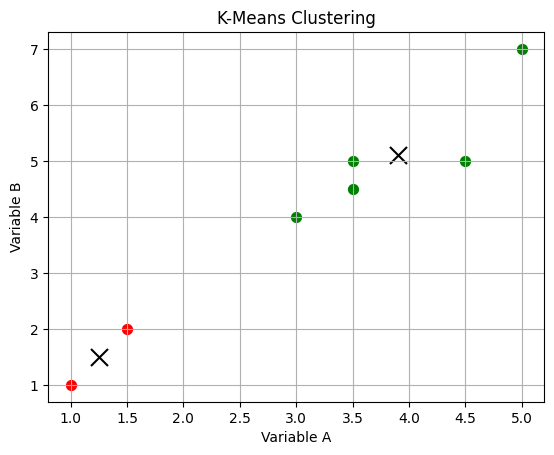

In [1]:
# 🧠 K-MEANS CLUSTERING IMPLEMENTATION
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Euclidean distance between two points
def euclidean_distance(point, centroid):
    return np.sqrt(np.sum((point - centroid) ** 2))

# Function to assign clusters based on nearest centroid
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters

# Function to recalculate centroids
def recalculate_centroids(data, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = data[np.array(clusters) == i]
        if len(cluster_points) > 0:
            new_centroid = np.mean(cluster_points, axis=0)
            new_centroids.append(new_centroid)
    return np.array(new_centroids)

# Function to run the K-Means algorithm
def kmeans(data, k, max_iterations=100):
    # Randomly initialize centroids by selecting k points from the dataset
    np.random.seed(42)  # For reproducibility
    initial_centroids_indices = np.random.choice(len(data), k, replace=False)
    centroids = data[initial_centroids_indices]

    for _ in range(max_iterations):
        # Step 1: Assign clusters based on nearest centroid
        clusters = assign_clusters(data, centroids)

        # Step 2: Recalculate centroids
        new_centroids = recalculate_centroids(data, clusters, k)

        # Check for convergence (if centroids do not change)
        if np.all(new_centroids == centroids):
            break

        centroids = new_centroids

    return clusters, centroids

# Example dataset
data = np.array([
    [1.0, 1.0],
    [1.5, 2.0],
    [3.0, 4.0],
    [5.0, 7.0],
    [3.5, 5.0],
    [4.5, 5.0],
    [3.5, 4.5]
])

# Number of clusters
k = 2

# Running K-Means clustering
clusters, final_centroids = kmeans(data, k)

# Display results
print("📊 Cluster Assignments:", clusters)
print("📍 Final Centroids:\n", final_centroids)

# Visualization
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for i in range(len(data)):
    plt.scatter(data[i][0], data[i][1], color=colors[clusters[i]], s=50)

for centroid in final_centroids:
    plt.scatter(centroid[0], centroid[1], marker='x', s=150, c='k')

plt.title("K-Means Clustering")
plt.xlabel("Variable A")
plt.ylabel("Variable B")
plt.grid(True)
plt.show()
